In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
scalar.ndim # Scalar is know as 0 rank tensor becuase it has no dimmensions and is just a number

0

In [4]:
# Create a Vector (more than 0 dimension)
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [5]:
vector.ndim

1

In [6]:
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                     [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]])>

In [7]:
matrix.ndim

2

## By default, TensorFlow creates tensors with either an `int32` or `float32` datatype
##### This is known as 32-bit precision (the higher the number, the more precise the number, the more space it takes up on our computer).

In [8]:
# Create another matrix and define the datatype
another_matrix = tf.constant([[10., 7.],
                             [3., 2.],
                             [8., 9.]], dtype=tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [9]:
another_matrix.ndim

2

In [10]:
# Tensor ( n-dimensional matrix)
tensor = tf.constant([[[1,2,3],
                      [4,5,6]],
                     [[7,8,9],
                      [10,11,12]],
                     [[13,14,15],
                      [16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [11]:
tensor.ndim # a tensor can have an arbitrary (unlimited) amounted of dimensions.

3

* Scalar: a sungle number.
* Vector: a number with direction (e.g wind speed with direction).
* Matrix: a 2-dimensional array of numbers.
* tensor: an n-dimensional array of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector).

## Creating Tensors with `tf.Variable()`

In [12]:
# Create the sama tensor with tf.Variable() and tf.constant()

changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>)

In [13]:
# To change an element of a tf.Variable() tensor requires the assign() method.
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7])>

In [14]:
# Now change a value in a tf.constant() tensor

# unchangeable_tensor[0].assign(7)

# Will error (can't change tf.constant())

# Creating random tensors

In [15]:
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3, 2)) # Create a tensor from normal distribution
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))

# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

# Shuffling the order of elements in a tensor

In [16]:
not_shuffled = tf.constant([[10, 7],
                           [3, 4],
                           [5, 6]])

# shuffle the non-shuffled tensor
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 5,  6],
       [10,  7],
       [ 3,  4]])>

In [17]:
# shuffle the non-shuffled tensor
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 5,  6]])>

In [18]:
## Other ways to make tensors
tf.ones([3, 7])

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [19]:
tf.zeros([3,7])

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

# Numpy arrays to tensors
#### The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster for numerical computing).

In [20]:
import numpy as np

numpy_A = np.arange(1, 19, dtype=np.int32) # Create a Numpy array between 1 and 15
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [21]:
A = tf.constant(numpy_A, shape=(2, 3, 3))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],
 
        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]]])>,
 <tf.Tensor: shape=(18,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18])>)

# Getting information from tensors

In [22]:
A.ndim, B.ndim

(3, 1)

In [23]:
 A.shape, B.shape

(TensorShape([2, 3, 3]), TensorShape([18]))

In [24]:
tf.size(A), tf.size(B)

(<tf.Tensor: shape=(), dtype=int32, numpy=18>,
 <tf.Tensor: shape=(), dtype=int32, numpy=18>)

In [25]:
# Create a rank 4 tensor (4 dimensions)

rank_4_tensor = tf.zeros(shape=[2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [26]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [27]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [28]:
rank_4_tensor.dtype

tf.float32

In [29]:
print("Toral number of elements in our tensor: ", tf.size(rank_4_tensor).numpy())

Toral number of elements in our tensor:  120


In [30]:
rank_4_tensor[:1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [31]:
# Get various attributes of Tensor
print("Datatype of every element: ", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor).numpy()) # .numpy() converts to NumPy array

Datatype of every element:  <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): 120


In [32]:
# Get the first 2 items of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [33]:
# Get the dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [34]:
# Create a rank 2 tensor(2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                            [3, 4]])

# get the last item of each row
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4])>

In [35]:
# Add an extra dimension ( to the end)
rank_3_tensor = rank_2_tensor[..., tf.newaxis] # in Python "..." means " all dimensions prior to"
rank_2_tensor, rank_3_tensor # shape (2, 2), shape (2, 2, 1)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]])>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [ 7]],
 
        [[ 3],
         [ 4]]])>)

### We can achieve the same thing using `tf.expand_dims()`.

In [36]:
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means last axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

# Manipulating tensors ( tensor Operations)

In [37]:
## Basic Operations
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]])>

### Since we used `tf.constant()`, the original tensor is unchanged (the addition gets done on a copy)

In [38]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]])>

In [39]:
# Other tenosr operations

# Multiplication
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

In [40]:
# Subtraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]])>

### We can also use the equivalent TensorFlow function. Using the TensorFlow function (where Possible) has the advantages of being sped up later down the line when running as part of a TensorFlow.


In [41]:
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

In [42]:
# the original tensor is still unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]])>

# Matrix multiplication

### The main rules are:
1. The inner dimensions must match: 
    - (3, 5) @ (5, 6) WILL WORK.
    - (3, 5) @ (3, 5) WON'T WORK.

2. The resulting matrix has the shape of the outer dimensions
    - (3, 5) @ (5, 6) --> (3, 6)
    - (3, 5) @ (5, 3) -_> (3, 3)

In [43]:
# Matrix multiplication in TensorFlow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]])>

In [44]:
# Matrix multiplication with Python operator @
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]])>

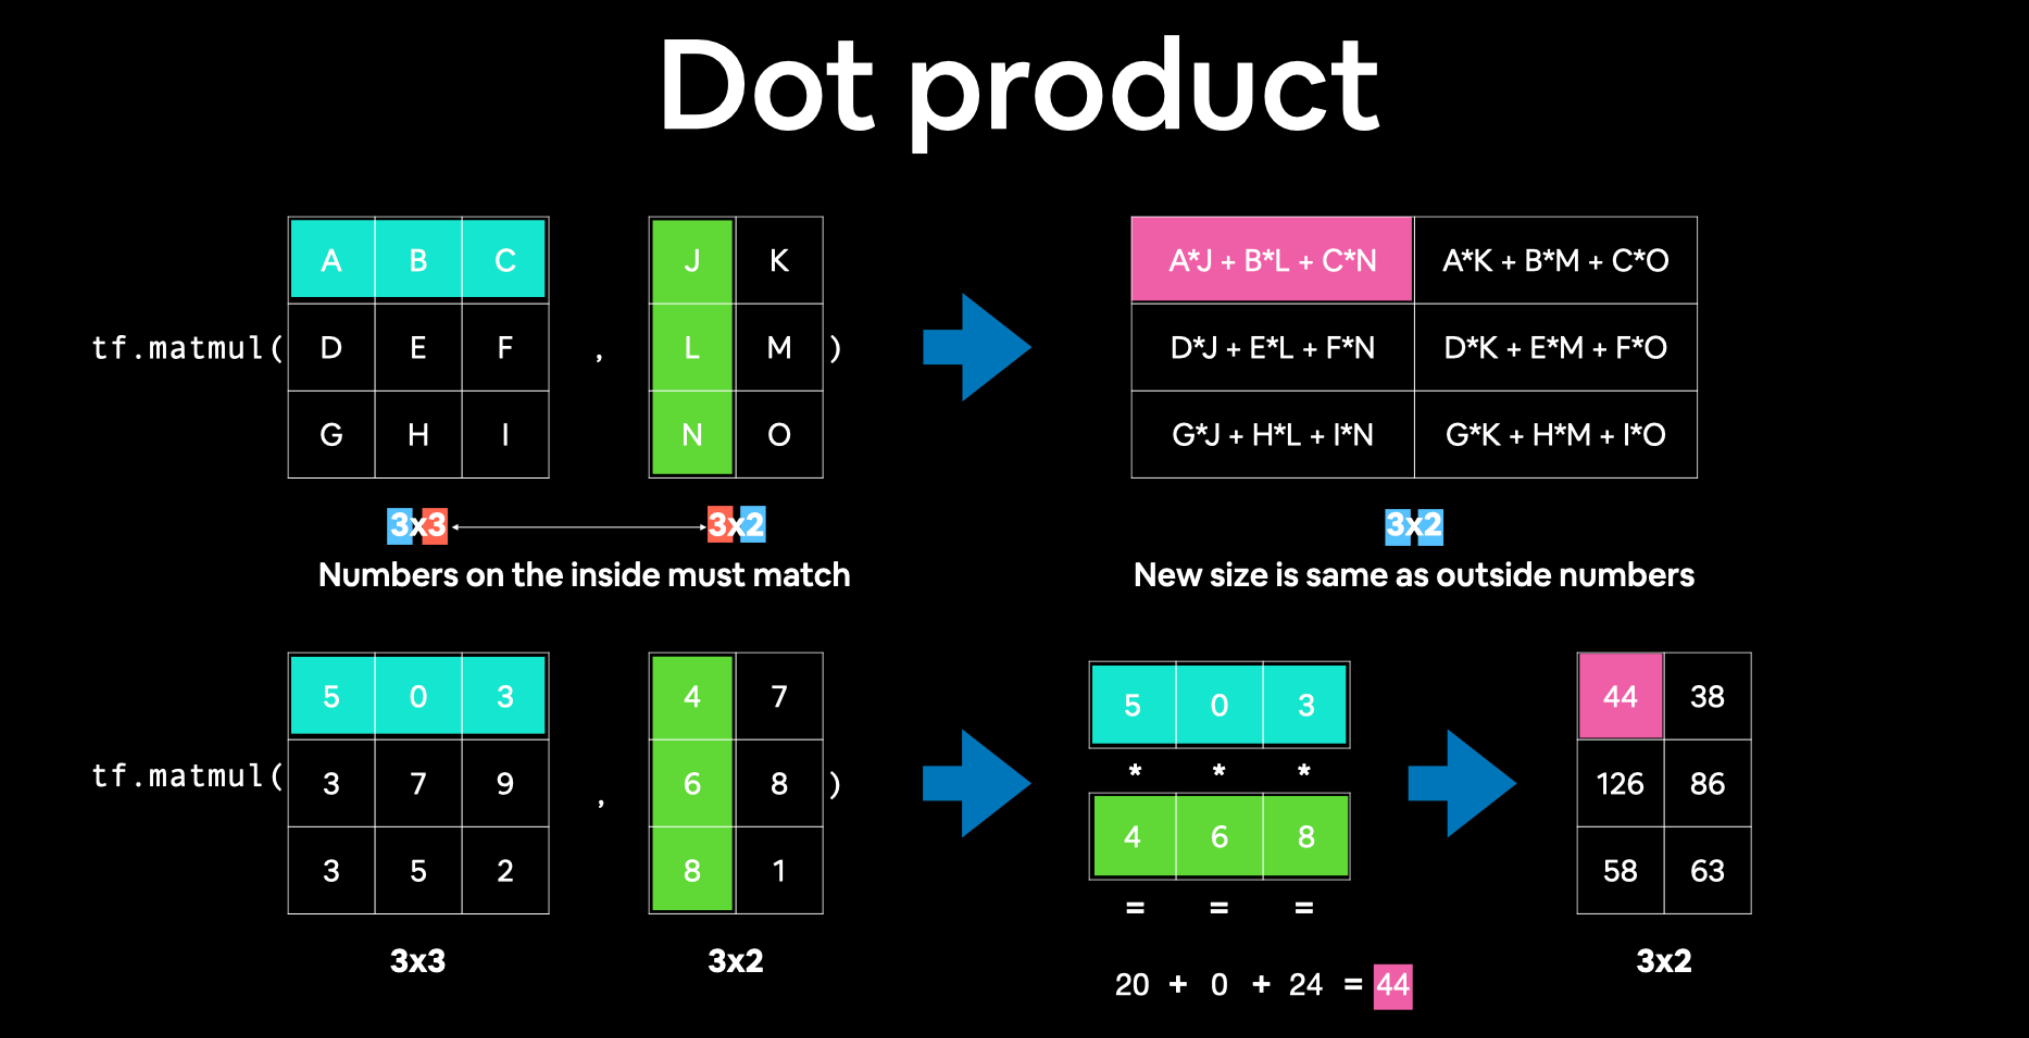

# 'tf.reshape()' 

In [45]:
# Create a (3, 2) tensor
X = tf.constant([[1, 2],
                [3, 4],
                [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                [9, 10],
                [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]])>)

In [46]:
# X @ Y
# this throws an error because thse two tensor inned dimensions do not match

In [47]:
# Example of reshape (3, 2) --> (2, 3)
tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]])>

In [48]:
# Now we can try matrix multiplication with reshaped Y
X @ tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

# This time, I'll try the same with a reshaped X, except this time I'll use `tf.transpose()` and `tf.matmul()`.

In [49]:
tf.transpose(X)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 3, 5],
       [2, 4, 6]])>

In [50]:
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]])>

In [51]:
tf.matmul(tf.transpose(Y), X)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89, 116],
       [ 98, 128]])>

In [52]:
# We can achieve the same result with parameters
tf.matmul(a=X, b=Y, transpose_a=True, transpose_b=False)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]])>

## The dot product

In [53]:
# Perform the dot product on X and Y (requires X to be transpose)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]])>

In [54]:
# Peroform Matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]])>

In [55]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, (2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

#### When dealing with `Y`(a (3x2) matrix), reshaping to (2,3) and transposing it result in the same shape.

In [56]:
# Check shapes of Y, reshaped Y and transposed Y
Y.shape, tf.reshape(Y, (2, 3)).shape, tf.transpose(Y).shape

(TensorShape([3, 2]), TensorShape([2, 3]), TensorShape([2, 3]))

### But calling `tf.reshape()` and `tf.transpose()` on `Y` don't necessarily result in the same values.

In [57]:
# Check the values of Y, reshape Y and transposed Y
print("Normal Y: ")
print(Y, "\n")

print("Y reshaped to (2, 3)")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed to (2, 3)")
print(tf.transpose(Y))

Normal Y: 
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3)
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed to (2, 3)
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


## Why?
- `tf.reshape()` - change the shape of the given tensor(first) and then insert values in order they appear (in our case, 7, 8, 9, 10, 11, 12).
- `tf.transpose()` - swap the order for the axes, by default the lase axis becomes the first, however the order can be changed to the perm(permutation) parameter

# Changing the datatype of a tensor using `tf.cast()`

In [58]:
# Create a new tensor with default datatype (float 32)
B = tf.constant([1.7, 7.4])

# Create a new tensor with default datatype (int32)
C = tf.constant([1, 7])
B, C

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 7])>)

In [59]:
# Change from float32 to float16 (reduced precision)
B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [60]:
# Change from int32 to int16
C = tf.cast(C, dtype=tf.int16)
C

<tf.Tensor: shape=(2,), dtype=int16, numpy=array([1, 7], dtype=int16)>

# Getting the absolute value using `tf.abs()`

In [61]:
# Create tensor with negative values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10])>

In [62]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10])>

# Finding the min, max, mean, sum (aggregation)

- `tf.reduce_min()` - find the minumum value in a tensor.
- `tf.reduce_max()` - find the max value in a tensor (helpful for when you want to find the highest prediction probability).
- `tf.reduce_sum()` - find the sume of all elements in a tensor.
- `tf.reduce_mean()`- find the mean of all elements in a tensor.

Note: typically, each of these is under the `math` module, e.g. `tf.math.reduce_min()` but we can use the alias `tf.reduce_min()`.

In [63]:
# Create a tensor with 50 random values between 0 and 100
E = tf.constant(np.random.randint(low=0, high=100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([98, 52, 99, 63, 25, 52, 40, 52, 14, 72, 62, 31, 87, 78, 77, 82, 27,
       88, 24, 89, 97, 13, 38, 92, 66, 27, 30, 48,  8, 84, 98, 37, 36, 75,
       54, 17, 48,  8, 92, 21, 78,  5, 65, 94, 13, 10,  7, 49, 74, 52])>

In [64]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [65]:
# Finde the max
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int32, numpy=99>

In [66]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int32, numpy=52>

In [67]:
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int32, numpy=2648>

In [68]:
# find the standard deviation
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=29.755644>

In [69]:
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=885.3984>

# Finding positional max and min

- `tf.argmax()` - find the position of the maximum element in a given tensor.
- `tf.argmin()` - find the position of the minumum element in a given tensor.

In [70]:
# Create a tensor with 50 values between 0 and 1
F = tf.constant(np.random.random(50))
F

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.07349324, 0.75297227, 0.76434296, 0.41978098, 0.46552374,
       0.94278082, 0.38281905, 0.89271669, 0.46216544, 0.88234303,
       0.21739186, 0.01905548, 0.04373645, 0.23909161, 0.4574811 ,
       0.17309638, 0.79325129, 0.67261638, 0.90192947, 0.26789484,
       0.83931528, 0.06342928, 0.42398499, 0.49802674, 0.76636785,
       0.15879244, 0.05658018, 0.95613695, 0.395387  , 0.39277885,
       0.24270274, 0.58551845, 0.95793733, 0.71879816, 0.10809543,
       0.96782623, 0.94321619, 0.53056902, 0.02339068, 0.63652437,
       0.90721773, 0.74135476, 0.06186786, 0.06216771, 0.59682455,
       0.92456314, 0.11624068, 0.03155308, 0.15417867, 0.36285968])>

In [71]:
# Find the maximum element position of F
print(tf.argmax(F))
print(F[tf.argmax(F)].numpy())

tf.Tensor(35, shape=(), dtype=int64)
0.9678262261624133


In [72]:
# Find the min
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=11>

In [73]:
tf.reduce_min(F).numpy() == F[tf.argmin(F)].numpy()

True

In [74]:
tf.reduce_max(F).numpy() == F[tf.argmax(F)].numpy()

True

# Squeezing a tensor (removing all single dimensions)
- tf.squeeze() - remove all dimensions of 1 from a tensor.

In [75]:
# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim

(TensorShape([1, 1, 1, 1, 50]), 5)

In [76]:
# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed.shape, G_squeezed.ndim

(TensorShape([50]), 1)

In [77]:
G[0, 0, 0, 0, :]

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([76, 76, 32, 55, 76, 80, 97, 83, 76, 87, 15, 72, 45, 36, 74, 31, 92,
       39, 19, 79,  8, 50, 10,  2, 22, 48,  0, 95, 65, 74, 67, 97,  6, 62,
       25, 18, 46,  7, 50, 83, 90, 80, 22, 26, 68, 10, 79, 30, 29, 67])>

# One-hot encoding
 * `depth` parameter should be specified

In [78]:
# Create a list of indices
some_list = [0, 1, 2, 3]

# one hot encode them
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

### We can also specify values for `on_value` and `off_value` instead of the default `0` and `1`.

In [79]:
# Specify custom values for on and off encoding
tf.one_hot(some_list, depth=4, on_value="We're live!", off_value="Offline")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b"We're live!", b'Offline', b'Offline', b'Offline'],
       [b'Offline', b"We're live!", b'Offline', b'Offline'],
       [b'Offline', b'Offline', b"We're live!", b'Offline'],
       [b'Offline', b'Offline', b'Offline', b"We're live!"]], dtype=object)>

# Squaring, log, square root

- `tf.square()` - get the square root of every value in a tensor.
- `tf.sqrt()` - get the squareroot of every value in a tensor (*Note: elements need to be floats or this will error).
- `tf.math.log()` - get the natural log of every value in a tensor (elements need to be floats)

In [80]:
# Create a new tensor
H = tf.constant(np.arange(1, 10))
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [81]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [82]:
# Squareroot it
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [83]:
# log it
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

# Manipulating `tf.variables tensors`
## Tensors created with it can be changed in place using methods such as:

- `.assign()` - assign a different value to a particular index of a variable tensor.
- `.add_assign()` - add to an existing value and reassign it at a particular index of a variable tensor.

In [84]:
# Create a variable tensor
I = tf.Variable(np.arange(0, 5))
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([0, 1, 2, 3, 4])>

In [85]:
# Assign the final value a new value of 50
I.assign([0, 1, 2, 3, 50])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int32, numpy=array([ 0,  1,  2,  3, 50])>

In [86]:
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([ 0,  1,  2,  3, 50])>

In [87]:
# Add 10 to every element in I
I.assign_add([10, 10, 10, 10, 10])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int32, numpy=array([10, 11, 12, 13, 60])>

In [88]:
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([10, 11, 12, 13, 60])>

# Tensors and NumPy

- `np.array()` - pass a tensor to convert to an ndarray (NumPy's main datatype).
- `tensor.numpy()` - call on a tensor to convert to an ndarray.


In [89]:
# Create a tensor from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [90]:
# Convert tensor J to NumPy array suing `np.array()`
type(J.numpy()), type(np.array(J))

(numpy.ndarray, numpy.ndarray)

In [91]:
# Create a tensor from NumPy and from an array
numpy_J = tf.constant(np.array([3., 7., 10.])) # will be float64 due to NumPy
tensor_J = tf.constant([3., 7., 10.]) # will be float32 due to being TensorFlow default
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

# Using `@tf.function`

In [92]:
# Create a simple function
def function(x, y):
    return x**2 + y

x = tf.constant(np.arange(0, 11))
y = tf.constant(np.arange(10, 21))
function(x, y)

<tf.Tensor: shape=(11,), dtype=int32, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100, 120])>

In [93]:
# create the same function and decorate it with tf.function

@tf.function
def tf_function(x, y):
    return x**2 + y
    
tf_function(x, y)

<tf.Tensor: shape=(11,), dtype=int32, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100, 120])>

In [94]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# 

# TensorFlow 2 quickstart for beginners 

In [95]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [96]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [97]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model.summary()

C:\Users\Jamshid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.32251295,  0.31409067,  0.06058265,  0.14259942, -0.07458612,
         0.07776492,  0.2659066 , -0.49200696,  0.06762729,  0.3247057 ]],
      dtype=float32)

In [99]:
tf.nn.softmax(predictions).numpy()

array([[0.12170324, 0.12068253, 0.09365851, 0.10166387, 0.08181714,
        0.09528169, 0.11500543, 0.05389651, 0.09432064, 0.1219704 ]],
      dtype=float32)

In [100]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [101]:
loss_fn(y_train[:1], predictions).numpy()

2.3509178

In [102]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [103]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.8577 - loss: 0.4916
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 808us/step - accuracy: 0.9554 - loss: 0.1541
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.9671 - loss: 0.1116
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 833us/step - accuracy: 0.9730 - loss: 0.0885
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9780 - loss: 0.0723


In [104]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - 661us/step - accuracy: 0.9776 - loss: 0.0745


[0.074452705681324, 0.9775999784469604]

In [105]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [106]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.7904115e-08, 1.0497547e-08, 5.6674105e-07, 1.0419342e-04,
        1.2475636e-12, 2.4393208e-07, 3.5966703e-14, 9.9989080e-01,
        3.2056453e-06, 9.4146901e-07],
       [5.2117055e-10, 1.0834159e-04, 9.9988842e-01, 1.4645790e-06,
        2.3204920e-14, 8.4550706e-08, 1.3738294e-06, 1.4119265e-14,
        2.5938752e-07, 2.5123004e-15],
       [1.1081832e-07, 9.9949419e-01, 8.9875721e-05, 1.3380615e-06,
        3.8784045e-05, 2.2690213e-06, 1.3387960e-05, 1.8531000e-04,
        1.7307448e-04, 1.5708165e-06],
       [9.9986959e-01, 2.8914773e-10, 1.5963672e-06, 1.0907858e-07,
        1.2610807e-06, 4.5938186e-06, 8.1904189e-05, 3.1925792e-05,
        7.7439822e-08, 8.8211200e-06],
       [3.5960471e-07, 1.2644831e-09, 3.2902344e-06, 6.5402809e-08,
        9.9062485e-01, 4.3424490e-07, 1.9913936e-05, 9.5954318e-05,
        2.3784178e-05, 9.2314715e-03]], dtype=float32)>